In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta,date
%matplotlib inline

In [2]:
df = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt", parse_dates=[[6,7]])

In [3]:
df.columns=df.columns.str.strip()

In [4]:
df1=df.iloc[:,[0,2,3,4,8,9]].copy()
df1['INFLOW']=0
df1['OUTFLOW']=0
df1['UNIQUE_STILE']=df1['STATION']+'*'+df1['UNIT']+'*'+df1['SCP']
df1['UNIQUE_UNIT']=df1['STATION']+'*'+df1['UNIT']
#df1['day_of_week']=df1['DATE_TIME']
#df1['day_of_week']=df1['DATE_TIME'].apply(lambda x: x.dt.weekday_name)
df1['day_of_week']=df1['DATE_TIME'].dt.day_name()
df1['time']=df1['DATE_TIME'].dt.time
df1.head(10)

,DATE_TIME,UNIT,SCP,STATION,ENTRIES,EXITS,INFLOW,OUTFLOW,UNIQUE_STILE,UNIQUE_UNIT,day_of_week,time
0,2019-05-18 00:00:00,R051,02-00-00,59 ST,7062481,2393489,0,0,59 ST*R051*02-00-00,59 ST*R051,Saturday,00:00:00
1,2019-05-18 04:00:00,R051,02-00-00,59 ST,7062505,2393492,0,0,59 ST*R051*02-00-00,59 ST*R051,Saturday,04:00:00
2,2019-05-18 08:00:00,R051,02-00-00,59 ST,7062529,2393526,0,0,59 ST*R051*02-00-00,59 ST*R051,Saturday,08:00:00
3,2019-05-18 12:00:00,R051,02-00-00,59 ST,7062627,2393612,0,0,59 ST*R051*02-00-00,59 ST*R051,Saturday,12:00:00
4,2019-05-18 16:00:00,R051,02-00-00,59 ST,7062835,2393662,0,0,59 ST*R051*02-00-00,59 ST*R051,Saturday,16:00:00
5,2019-05-18 20:00:00,R051,02-00-00,59 ST,7063097,2393696,0,0,59 ST*R051*02-00-00,59 ST*R051,Saturday,20:00:00
6,2019-05-19 00:00:00,R051,02-00-00,59 ST,7063280,2393719,0,0,59 ST*R051*02-00-00,59 ST*R051,Sunday,00:00:00
7,2019-05-19 04:00:00,R051,02-00-00,59 ST,7063308,2393725,0,0,59 ST*R051*02-00-00,59 ST*R051,Sunday,04:00:00
8,2019-05-19 08:00:00,R051,02-00-00,59 ST,7063316,2393744,0,0,59 ST*R051*02-00-00,59 ST*R051,Sunday,08:00:00
9,2019-05-19 12:00:00,R051,02-00-00,59 ST,7063393,2393793,0,0,59 ST*R051*02-00-00,59 ST*R051,Sunday,12:00:00


In [7]:
df1['INFLOW'] = df1.ENTRIES.shift(-1)-df.ENTRIES
df1['OUTFLOW'] = df1.EXITS.shift(-1) - df.EXITS

In [8]:
df1.head(10)

,DATE_TIME,UNIT,SCP,STATION,ENTRIES,EXITS,INFLOW,OUTFLOW,UNIQUE_STILE,UNIQUE_UNIT,day_of_week,time
0,2019-05-18 00:00:00,R051,02-00-00,59 ST,7062481,2393489,24.0,3.0,59 ST*R051*02-00-00,59 ST*R051,Saturday,00:00:00
1,2019-05-18 04:00:00,R051,02-00-00,59 ST,7062505,2393492,24.0,34.0,59 ST*R051*02-00-00,59 ST*R051,Saturday,04:00:00
2,2019-05-18 08:00:00,R051,02-00-00,59 ST,7062529,2393526,98.0,86.0,59 ST*R051*02-00-00,59 ST*R051,Saturday,08:00:00
3,2019-05-18 12:00:00,R051,02-00-00,59 ST,7062627,2393612,208.0,50.0,59 ST*R051*02-00-00,59 ST*R051,Saturday,12:00:00
4,2019-05-18 16:00:00,R051,02-00-00,59 ST,7062835,2393662,262.0,34.0,59 ST*R051*02-00-00,59 ST*R051,Saturday,16:00:00
5,2019-05-18 20:00:00,R051,02-00-00,59 ST,7063097,2393696,183.0,23.0,59 ST*R051*02-00-00,59 ST*R051,Saturday,20:00:00
6,2019-05-19 00:00:00,R051,02-00-00,59 ST,7063280,2393719,28.0,6.0,59 ST*R051*02-00-00,59 ST*R051,Sunday,00:00:00
7,2019-05-19 04:00:00,R051,02-00-00,59 ST,7063308,2393725,8.0,19.0,59 ST*R051*02-00-00,59 ST*R051,Sunday,04:00:00
8,2019-05-19 08:00:00,R051,02-00-00,59 ST,7063316,2393744,77.0,49.0,59 ST*R051*02-00-00,59 ST*R051,Sunday,08:00:00
9,2019-05-19 12:00:00,R051,02-00-00,59 ST,7063393,2393793,199.0,44.0,59 ST*R051*02-00-00,59 ST*R051,Sunday,12:00:00


In [9]:
df1.describe()

,ENTRIES,EXITS,INFLOW,OUTFLOW
count,2.033630e+05,2.033630e+05,2.033620e+05,2.033620e+05
mean,4.281813e+07,3.481153e+07,-3.470131e+01,-1.176774e+01
std,2.156947e+08,1.969479e+08,4.553872e+07,4.139327e+07
min,0.000000e+00,0.000000e+00,-2.115924e+09,-2.111058e+09
25%,3.792255e+05,1.530485e+05,8.000000e+00,7.000000e+00
50%,2.271380e+06,1.293828e+06,7.400000e+01,5.400000e+01
75%,6.872199e+06,4.684228e+06,2.530000e+02,1.760000e+02
max,2.129302e+09,2.124075e+09,2.121049e+09,2.118791e+09


In [10]:
df1 = df1[(df1.INFLOW > 0) & (df1.INFLOW < 7000) & (df1.OUTFLOW > 0) & (df1.OUTFLOW < 7000)]


In [11]:
df1.describe()

,ENTRIES,EXITS,INFLOW,OUTFLOW
count,1.618300e+05,1.618300e+05,161830.000000,161830.000000
mean,2.781293e+07,2.049043e+07,216.951054,169.807112
std,1.603720e+08,1.346819e+08,278.352652,257.162032
min,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,7.034795e+05,3.899950e+05,32.000000,26.000000
50%,2.872132e+06,1.691247e+06,122.000000,83.000000
75%,7.130675e+06,5.105719e+06,300.000000,210.000000
max,2.115837e+09,2.037851e+09,6649.000000,6918.000000


In [43]:

df1.sort_values(by='OUTFLOW',ascending=False)
top_ten=df1.head(10)
top_ten

,DATE_TIME,UNIT,SCP,STATION,ENTRIES,EXITS,INFLOW,OUTFLOW,UNIQUE_STILE,UNIQUE_UNIT,day_of_week,time
0,2019-05-18 00:00:00,R051,02-00-00,59 ST,7062481,2393489,24.0,3.0,59 ST*R051*02-00-00,59 ST*R051,Saturday,00:00:00
1,2019-05-18 04:00:00,R051,02-00-00,59 ST,7062505,2393492,24.0,34.0,59 ST*R051*02-00-00,59 ST*R051,Saturday,04:00:00
2,2019-05-18 08:00:00,R051,02-00-00,59 ST,7062529,2393526,98.0,86.0,59 ST*R051*02-00-00,59 ST*R051,Saturday,08:00:00
3,2019-05-18 12:00:00,R051,02-00-00,59 ST,7062627,2393612,208.0,50.0,59 ST*R051*02-00-00,59 ST*R051,Saturday,12:00:00
4,2019-05-18 16:00:00,R051,02-00-00,59 ST,7062835,2393662,262.0,34.0,59 ST*R051*02-00-00,59 ST*R051,Saturday,16:00:00
5,2019-05-18 20:00:00,R051,02-00-00,59 ST,7063097,2393696,183.0,23.0,59 ST*R051*02-00-00,59 ST*R051,Saturday,20:00:00
6,2019-05-19 00:00:00,R051,02-00-00,59 ST,7063280,2393719,28.0,6.0,59 ST*R051*02-00-00,59 ST*R051,Sunday,00:00:00
7,2019-05-19 04:00:00,R051,02-00-00,59 ST,7063308,2393725,8.0,19.0,59 ST*R051*02-00-00,59 ST*R051,Sunday,04:00:00
8,2019-05-19 08:00:00,R051,02-00-00,59 ST,7063316,2393744,77.0,49.0,59 ST*R051*02-00-00,59 ST*R051,Sunday,08:00:00
9,2019-05-19 12:00:00,R051,02-00-00,59 ST,7063393,2393793,199.0,44.0,59 ST*R051*02-00-00,59 ST*R051,Sunday,12:00:00


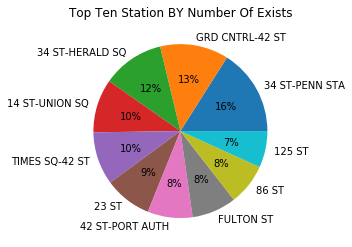

In [44]:
Exits_pie = df1.groupby('STATION').sum().sort_values('OUTFLOW',ascending=False)
plt.pie(Exits_pie.head(10).OUTFLOW,labels= Exits_pie.head(10).index.values,autopct='%1.0f%%');
#df1.nlargest(10,'OUTFLOW').plot.pie(loglog=False,figsize=(16,8),stacked=False);
plt.title("Top Ten Station BY Number Of Exists");

In [45]:
top_stations=Exits_pie.head(5).index.to_list()
df1.loc[df1.STATION.isin(top_stations)].shape
top_five = df1.loc[df1.STATION.isin(top_stations)].sort_values(by=['OUTFLOW'],ascending=False)

top_five

,DATE_TIME,UNIT,SCP,STATION,ENTRIES,EXITS,INFLOW,OUTFLOW,UNIQUE_STILE,UNIQUE_UNIT,day_of_week,time
156889,2019-05-22 09:00:00,R047,00-00-00,GRD CNTRL-42 ST,5265403,12817647,230.0,4114.0,GRD CNTRL-42 ST*R047*00-00-00,GRD CNTRL-42 ST*R047,Wednesday,09:00:00
156895,2019-05-23 09:00:00,R047,00-00-00,GRD CNTRL-42 ST,5268463,12830459,251.0,3879.0,GRD CNTRL-42 ST*R047*00-00-00,GRD CNTRL-42 ST*R047,Thursday,09:00:00
156875,2019-05-20 09:00:00,R047,00-00-00,GRD CNTRL-42 ST,5259778,12794107,200.0,3826.0,GRD CNTRL-42 ST*R047*00-00-00,GRD CNTRL-42 ST*R047,Monday,09:00:00
156515,2019-05-23 08:00:00,R046,00-06-02,GRD CNTRL-42 ST,10053409,12636813,242.0,3682.0,GRD CNTRL-42 ST*R046*00-06-02,GRD CNTRL-42 ST*R046,Thursday,08:00:00
156883,2019-05-21 09:00:00,R047,00-00-00,GRD CNTRL-42 ST,5262732,12806110,192.0,3578.0,GRD CNTRL-42 ST*R047*00-00-00,GRD CNTRL-42 ST*R047,Tuesday,09:00:00
156495,2019-05-20 08:00:00,R046,00-06-02,GRD CNTRL-42 ST,10048428,12609769,361.0,3431.0,GRD CNTRL-42 ST*R046*00-06-02,GRD CNTRL-42 ST*R046,Monday,08:00:00
156894,2019-05-23 05:00:00,R047,00-00-00,GRD CNTRL-42 ST,5268424,12827049,39.0,3410.0,GRD CNTRL-42 ST*R047*00-00-00,GRD CNTRL-42 ST*R047,Thursday,05:00:00
156888,2019-05-22 05:00:00,R047,00-00-00,GRD CNTRL-42 ST,5265346,12814261,57.0,3386.0,GRD CNTRL-42 ST*R047*00-00-00,GRD CNTRL-42 ST*R047,Wednesday,05:00:00
156901,2019-05-24 09:00:00,R047,00-00-00,GRD CNTRL-42 ST,5271723,12842165,346.0,3380.0,GRD CNTRL-42 ST*R047*00-00-00,GRD CNTRL-42 ST*R047,Friday,09:00:00
156874,2019-05-20 05:00:00,R047,00-00-00,GRD CNTRL-42 ST,5259724,12790736,54.0,3371.0,GRD CNTRL-42 ST*R047*00-00-00,GRD CNTRL-42 ST*R047,Monday,05:00:00


<BarContainer object of 11954 artists>

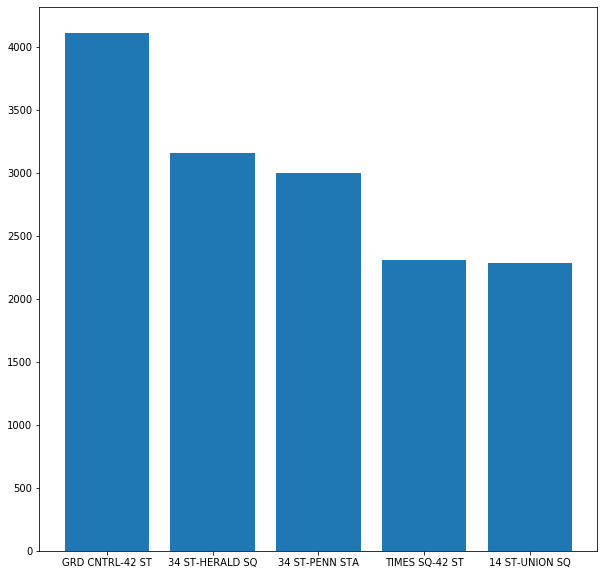

In [47]:
# top_five.plot()
plt.figure(figsize=(10,10))
plt.bar(top_five['STATION'],top_five['OUTFLOW'])



Text(0.5, 1.0, 'Most Crowded Days')

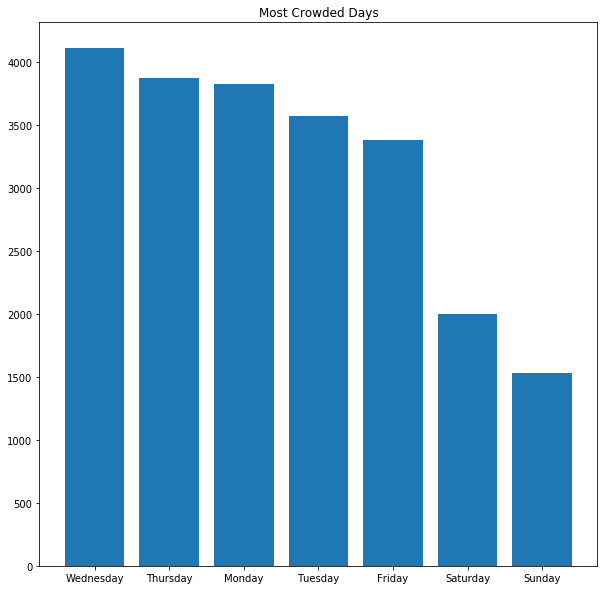

In [48]:
# top_five.plot()
plt.figure(figsize=(10,10))
plt.bar(top_five['day_of_week'],top_five['OUTFLOW'])
plt.title("Most Crowded Days")



Text(0.5, 1.0, 'Most Crowded Times')

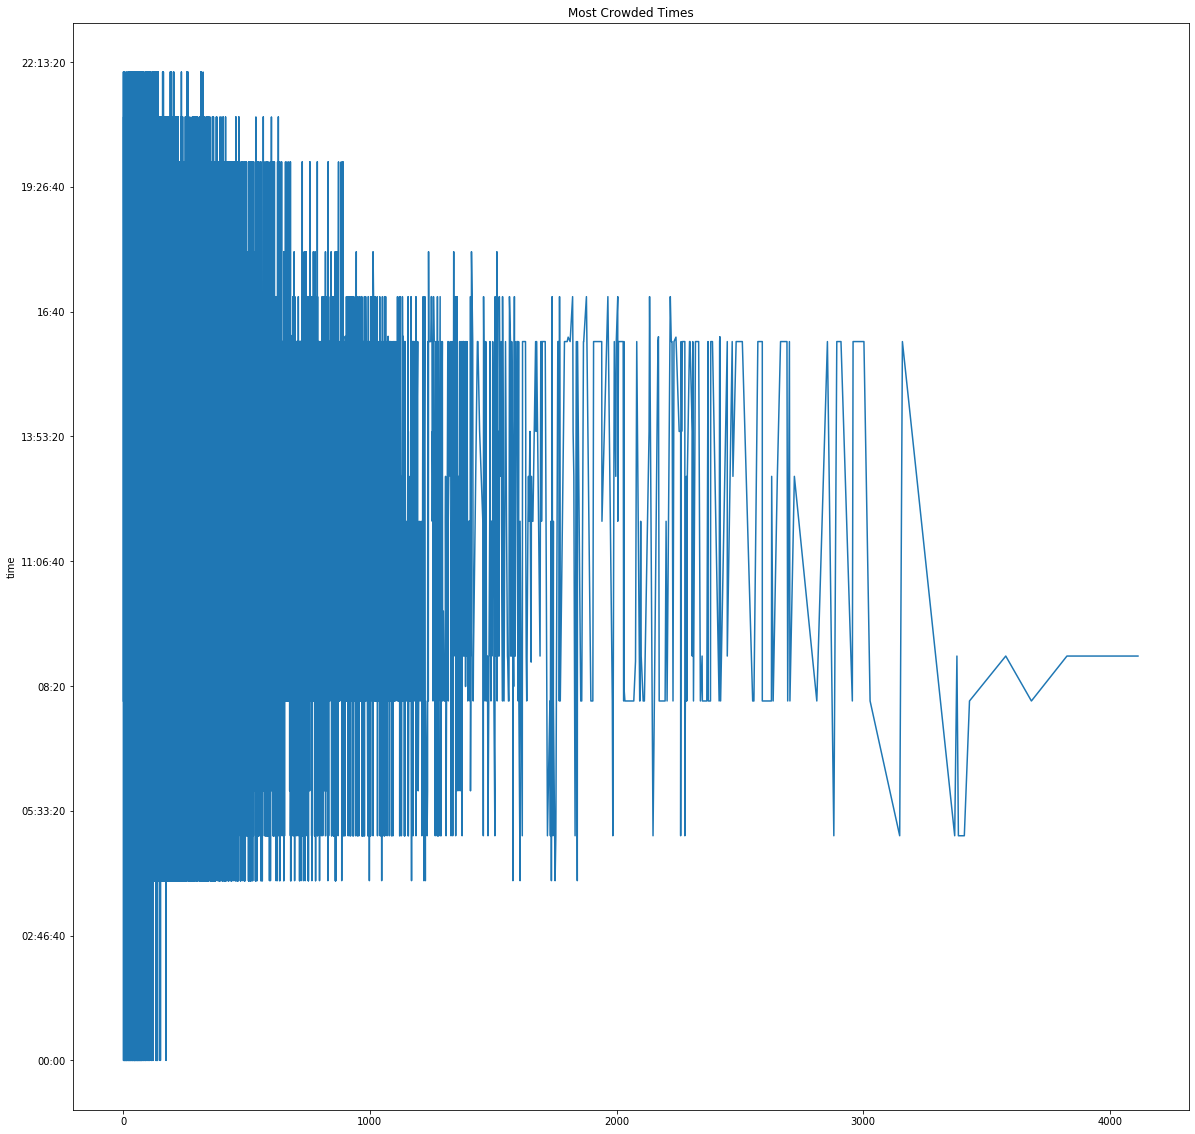

In [31]:
# top_five.plot()
plt.figure(figsize=(20,20))
plt.plot(top_five['OUTFLOW'],top_five['time'])
plt.title("Most Crowded Times")


# time_bar=df.groupby(['time']).sum().sort_values("OUTFLOW", ascending=False)
# plt.pie(Exits_pie.head(10).New_Exits,labels= Exits_pie.head(10).index.values,autopct='%1.0f%%');




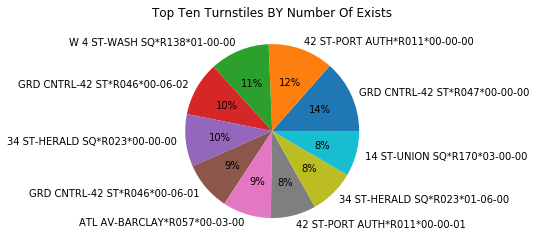

In [40]:
top_five = df1.groupby('UNIQUE_STILE').sum().sort_values('OUTFLOW',ascending=False)
plt.pie(top_five.head(10).OUTFLOW,labels= top_five.head(10).index.values,autopct='%1.0f%%');
#df1.nlargest(10,'OUTFLOW').plot.pie(loglog=False,figsize=(16,8),stacked=False);
plt.title("Top Ten Turnstiles BY Number Of Exists");

#Exits_pie = df.groupby('STATION').sum().sort_values('New_Exits',ascending=False)


In [ ]:
#df1.STATION.isin(top_stations)
# df1.STATION.apply(lambda x: x in top_stations).sum()

In [ ]:
#The chart is sorted by Number of exits beacuse we focused in it.
#Exits_bar=df1.groupby(['UNIQUE_STILE']).sum().sort_values("OUTFLOW", ascending=False)
#df1.nlargest(10,'OUTFLOW').plot.bar(loglog=False,figsize=(16,8),stacked=False);

In [ ]:
#Exits_bar.nlargest(10,'OUTFLOW').plot.bar(loglog=False,figsize=(16,8),stacked=False);

In [ ]:
# plt.scatter(df1['OUTFLOW'],df1['INFLOW'])
# plt.title("Entries & Exits correlation Rate")
# plt.xlabel("INFLOW")
# plt.ylabel("OUTFLOW")
# plt.show()

In [ ]:
# plt.plot(df1['OUTFLOW'], df1['OUTFLOW'], 'r--', df1['INFLOW'], df1['INFLOW'], 'bs')
# plt.grid(True)
# plt.show()

In [ ]:
#plt.figure(1)
# plt.figure(num=None, figsize=(8, 10), dpi=50, facecolor='w', edgecolor='g')
# plt.subplot(211)
# plt.hist(df1['INFLOW'],bins = 20)
# plt.title("ENTRIES DISTRIBUTION")
# plt.xlabel("INFLOW")
# plt.ylabel("FREQUENCY")
# plt.grid(True)

# plt.subplot(212)
# plt.hist(df1['OUTFLOW'],bins = 20)
# plt.title("Exits DISTRIBUTION")
# plt.xlabel("OUTFLOW")
# plt.ylabel("FREQUENCY")
# plt.grid(True)
# plt.show()

In [ ]:
# dt_bar=df1.groupby(['DATE_TIME']).sum().sort_values("OUTFLOW", ascending=False)


# dt_bar.nlargest(10,['OUTFLOW']).plot(kind='bar', loglog=False,figsize=(16,8),stacked=False);

In [ ]:
#plt.figure(figsize=(8,8))
#toyStory_movie['Rating'].value_counts().plot(kind='bar', alpha=0.7)
#plt.title('The User Rating of The Movie Toy Story')



In [ ]:
# df1[df1['STATION']=='34 ST-PENN STA'].groupby('DATE_TIME').datetime.time().mean().plot(kind='bar', loglog=False,figsize=(16,8),stacked=False);
